In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('train.csv')
dataset_t = pd.read_csv('test.csv')

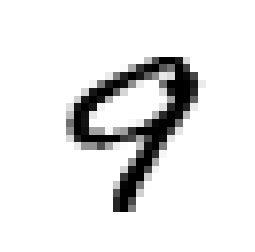

In [3]:
#show image
some_digit = dataset.iloc[100,1:]
some_digit_image = some_digit.values.reshape(28,28) # reshape to square
plt.imshow(some_digit_image,cmap = plt.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()



In [4]:
#Encode categorical integer features using a one-hot 
dataset=pd.get_dummies(dataset,columns=["label"])

# Seprate X and y
dataset_X = dataset.iloc[:, :-10].values
dataset_y = dataset.iloc[:, -10:].values
dataset_t=dataset_t.values

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dataset_X = sc.fit_transform(dataset_X)
dataset_t = sc.transform(dataset_t)


#Split trainning and testing case，make sure every digit have equal chance in both testing and trainning set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset_X, dataset_y,
                                                    test_size=0.2,
                                                    stratify=dataset_y)

C:\Users\fumiaki\Anaconda3\envs\tf_conda\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dataset_X = sc.fit_transform(dataset_X)
dataset_t = sc.transform(dataset_t)

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset_X, dataset_y,
                                                    test_size=0.2,
                                                    stratify=dataset_y)

In [7]:
x_train.shape

(33600, 784)

In [8]:
g1 = tf.Graph()

#Create g1 Graph
g1 = tf.Graph()
#Set g1 Graph as default graph, and construct it.
with g1.as_default():
    X = tf.placeholder(tf.float32,[None,784]) #for input 
    
    W= tf.Variable(tf.zeros([784,10]))
    b= tf.Variable(tf.zeros([10]))

    #model
    Ylogits=tf.matmul(X,W) + b
    # If you want to assign probabilities to an object being one of several different things,
    #softmax is the thing to do, because softmax gives us a list of values between 0 and 1 that add up to 1. 
    Y = tf.nn.softmax(Ylogits)
    #placeholder for correct labels
    Y_=tf.placeholder(tf.float32,[None,10])

    # loss function
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=Ylogits,labels=Y_))
    
    #Evaluate the model
    correct_prediction = tf.equal(tf.argmax(Y,1), tf.argmax(Y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    optimizer = tf.train.GradientDescentOptimizer(0.5)#0.5 is 
    train_step = optimizer.minimize(cross_entropy)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [9]:
def runmodel():
    init = tf.global_variables_initializer()
    sess.run(init)
    
    batch_size=100 # each time how many case input to NN for trainning
    epoch=20 # how many time the NN view the whole data set
    iterations=int(x_train.shape[0]/batch_size)
    
    batchnumber=0
   # mini batch
    for e in range(epoch):
        for i in range(iterations):
            batchnumber= batchnumber+1
            batch_start_idx = (i * batch_size) % (x_train.shape[0] - batch_size)
            batch_end_idx = batch_start_idx + batch_size
            batch_X = x_train[batch_start_idx:batch_end_idx]
            batch_Y = y_train[batch_start_idx:batch_end_idx]
            train_data = {X:batch_X,Y_:batch_Y}
            # train
            sess.run(train_step, feed_dict=train_data)
        print ("Epoch"+str(e+1))
        print ("batch: "+ str(batchnumber+1))
        ans=sess.run(accuracy,feed_dict={X:x_test,Y_:y_test}) # evaluate the testing dataset.
        print(ans)

In [10]:
with tf.Session(graph = g1) as sess:
    runmodel()

Epoch1
batch: 337
0.8977381
Epoch2
batch: 673
0.8989286
Epoch3
batch: 1009
0.89678574
Epoch4
batch: 1345
0.8971428
Epoch5
batch: 1681
0.8970238
Epoch6
batch: 2017
0.8982143
Epoch7
batch: 2353
0.89940476
Epoch8
batch: 2689
0.89988095
Epoch9
batch: 3025
0.8978571
Epoch10
batch: 3361
0.8996429
Epoch11
batch: 3697
0.89761907
Epoch12
batch: 4033
0.89690477
Epoch13
batch: 4369
0.8979762
Epoch14
batch: 4705
0.89607143
Epoch15
batch: 5041
0.89607143
Epoch16
batch: 5377
0.89678574
Epoch17
batch: 5713
0.89547616
Epoch18
batch: 6049
0.8934524
Epoch19
batch: 6385
0.89619046
Epoch20
batch: 6721
0.8947619


In [11]:
g2 = tf.Graph()
with g2.as_default():
    X = tf.placeholder(tf.float32,[None,784])
    
    # Hidden 1
    with tf.name_scope('hidden1'):
        weights = tf.Variable(
        tf.truncated_normal([784, 120],
                            stddev=1.0 / math.sqrt(float(784))),name='weights')
        biases = tf.Variable(tf.zeros([120]),
                         name='biases')
        hidden1 = tf.nn.relu(tf.matmul(X, weights) + biases)
    
    # Hidden 2
    with tf.name_scope('hidden2'):
        weights = tf.Variable(
        tf.truncated_normal([120, 32],
                            stddev=1.0 / math.sqrt(float(128))),
        name='weights')
        biases = tf.Variable(tf.zeros([32]),
                         name='biases')
        hidden2 = tf.nn.relu(tf.matmul(hidden1, weights) + biases)
  # Linear    
    with tf.name_scope('softmax_linear'):
        weights = tf.Variable(tf.zeros([32,10]),name='weights')
        biases = tf.Variable(tf.zeros([10]),name='biases')
        Ylogits = tf.matmul(hidden2, weights) + biases
        Y = tf.nn.softmax(Ylogits)
    
    Y_=tf.placeholder(tf.float32,[None,10])

    # loss function
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=Ylogits,labels=Y_))

    correct_prediction = tf.equal(tf.argmax(Y,1), tf.argmax(Y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    optimizer = tf.train.GradientDescentOptimizer(0.005) #learnning rate is key
    train_step = optimizer.minimize(cross_entropy)

In [12]:
# run the second ANN
with tf.Session(graph = g2) as sess:
    runmodel()

Epoch1
batch: 337
0.3895238
Epoch2
batch: 673
0.4097619
Epoch3
batch: 1009
0.47928572
Epoch4
batch: 1345
0.67511904
Epoch5
batch: 1681
0.8025
Epoch6
batch: 2017
0.8472619
Epoch7
batch: 2353
0.8736905
Epoch8
batch: 2689
0.8863095
Epoch9
batch: 3025
0.89285713
Epoch10
batch: 3361
0.8997619
Epoch11
batch: 3697
0.9054762
Epoch12
batch: 4033
0.91083336
Epoch13
batch: 4369
0.9159524
Epoch14
batch: 4705
0.91880953
Epoch15
batch: 5041
0.9210714
Epoch16
batch: 5377
0.92392856
Epoch17
batch: 5713
0.9260714
Epoch18
batch: 6049
0.92833334
Epoch19
batch: 6385
0.93083334
Epoch20
batch: 6721
0.9322619


In [13]:
g3 = tf.Graph()
with g3.as_default():
    X = tf.placeholder(tf.float32,[None,784])
    X_image = tf.reshape(X,[-1,28,28,1])
    
    # correct answers will go here
    Y_ = tf.placeholder(tf.float32, [None, 10])
    
    K = 32  # first convolutional layer output depth
    L = 64  # second convolutional layer output depth
    N = 1024  # fully connected layer
    
    W1 = tf.Variable(tf.truncated_normal([5, 5, 1, K], stddev=0.1))  # 5x5 patch, 1 input channel, K output channels
    B1 = tf.Variable(tf.ones([K])/10)
    
    W2 = tf.Variable(tf.truncated_normal([5, 5, K, L], stddev=0.1))
    B2 = tf.Variable(tf.ones([L])/10)
    
    W3 = tf.Variable(tf.truncated_normal([7 * 7 * L, N], stddev=0.1))
    B3 = tf.Variable(tf.ones([N])/10)
    
    W4 = tf.Variable(tf.truncated_normal([N, 10], stddev=0.1))
    B4 = tf.Variable(tf.ones([10])/10)
    
    # The model
    
    stride = 1  # output is 28x28*32
    Y1 = tf.nn.relu(tf.nn.conv2d(X_image, W1, strides=[1, stride, stride, 1], padding='SAME') + B1)
    
    #Max pooling, output is 14*14*32
    Y2 = tf.nn.max_pool(Y1,ksize=[1,2,2,1],strides=[1,2,2,1], padding='SAME')
    
    stride = 1  # output is 14x14*64
    Y3 = tf.nn.relu(tf.nn.conv2d(Y2, W2, strides=[1, stride, stride, 1], padding='SAME') + B2)
    
    #Max pooling, output is 7*7*64
    Y4 = tf.nn.max_pool(Y3,ksize=[1,2,2,1],strides=[1,2,2,1], padding='SAME')
    
    # reshape the output from the second Max pooling for the fully connected layer
    YY = tf.reshape(Y4, shape=[-1, 7 * 7 * L])
    
    Y5 = tf.nn.relu(tf.matmul(YY, W3) + B3)
    
    keep_prob = tf.placeholder(tf.float32)
    full1_drop = tf.nn.dropout(Y5, keep_prob=keep_prob)
    
    Ylogits = tf.matmul(full1_drop, W4) + B4
    Y = tf.nn.softmax(Ylogits)
    
     # loss function
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=Ylogits,labels=Y_))

    correct_prediction = tf.equal(tf.argmax(Y,1), tf.argmax(Y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    # variable learning rate
    lr = tf.placeholder(tf.float32)
    
    optimizer = tf.train.AdamOptimizer(lr)
    train_step = optimizer.minimize(cross_entropy)


In [14]:
with tf.Session( graph = g3) as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    batch_size=50 # each time how many case input to NN for trainning
    epoch=10 # how many time the NN view the whole data set
    iterations=int(x_train.shape[0]/batch_size)
    
    batchnumber=0
    
    # learning rate decay
    max_learning_rate = 0.004
    min_learning_rate = 0.0001
    decay_speed = 2000.0
    learning_rate = min_learning_rate + (max_learning_rate - min_learning_rate) * math.exp(-batchnumber/decay_speed)
    
   # mini batch
    for e in range(epoch):
        for i in range(iterations):
            batchnumber= batchnumber+1
            batch_start_idx = (i * batch_size) % (x_train.shape[0] - batch_size)
            batch_end_idx = batch_start_idx + batch_size
            batch_X = x_train[batch_start_idx:batch_end_idx]
            batch_Y = y_train[batch_start_idx:batch_end_idx]
            train_data = {X:batch_X,Y_:batch_Y,keep_prob:0.5,lr:learning_rate} #50% node drop out
            # train
            sess.run(train_step, feed_dict=train_data)
        print ("Epoch"+str(e+1))
        print ("batch: "+ str(batchnumber+1))
        ans=sess.run(accuracy,feed_dict={X:x_test,Y_:y_test,keep_prob:1,lr:learning_rate}) # evaluate the testing dataset.
        print(ans)
        
     #Output the result
    results = sess.run(Y,feed_dict={X:dataset_t,keep_prob:1})
       
     # select the indix with the maximum probability
    results = np.argmax(results,axis = 1)

    results = pd.Series(results,name="Label")
        
    submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

    submission.to_csv("cnn_mnist_datagen.csv",index=False)

Epoch1
batch: 673
0.9522619
Epoch2
batch: 1345
0.97011906
Epoch3
batch: 2017
0.9696429
Epoch4
batch: 2689
0.97321427
Epoch5
batch: 3361
0.9697619
Epoch6
batch: 4033
0.97261906
Epoch7
batch: 4705
0.9745238
Epoch8
batch: 5377
0.9767857
Epoch9
batch: 6049
0.97952384
Epoch10
batch: 6721
0.9765476


In [15]:


g4 = tf.Graph()
with g4.as_default():
    element_size = 28
    time_steps = 28
    num_classes =10
    batch_size = 128
    hidden_layer_size=128
    
    X = tf.placeholder(tf.float32,[None,784])
    X_image = tf.reshape(X,[-1,28,28])
    Y_ = tf.placeholder(tf.float32, shape=[None,num_classes])
    
    rnn_cell =tf.contrib.rnn.BasicRNNCell(hidden_layer_size)
    outputs, _ = tf.nn.dynamic_rnn(rnn_cell,X_image,dtype=tf.float32)
    
    wl = tf.Variable(tf.truncated_normal([hidden_layer_size,num_classes],mean=0,stddev=.01))
    bl = tf.Variable(tf.truncated_normal([num_classes],mean=0,stddev=.01))
    
    last_run_output = outputs[:,-1,:]
    
    final_output = tf.matmul(last_run_output,wl) + bl
    
     # loss function
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=final_output,labels=Y_))

    correct_prediction = tf.equal(tf.argmax(final_output,1), tf.argmax(Y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    optimizer = tf.train.RMSPropOptimizer(0.001,0.9)
    train_step = optimizer.minimize(cross_entropy)

In [16]:
with tf.Session( graph = g4) as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    batch_size=100 # each time how many case input to NN for trainning
    epoch=20 # how many time the NN view the whole data set
    iterations=int(x_train.shape[0]/batch_size)
    
    batchnumber=0
   # mini batch
    for e in range(epoch):
        for i in range(iterations):
            batchnumber= batchnumber+1
            batch_start_idx = (i * batch_size) % (x_train.shape[0] - batch_size)
            batch_end_idx = batch_start_idx + batch_size
            batch_X = x_train[batch_start_idx:batch_end_idx]
            batch_Y = y_train[batch_start_idx:batch_end_idx]
            train_data = {X:batch_X,Y_:batch_Y}
            # train
            sess.run(train_step, feed_dict=train_data)
        print ("Epoch"+str(e+1))
        print ("batch: "+ str(batchnumber+1))
        ans=sess.run(accuracy,feed_dict={X:x_test,Y_:y_test}) # evaluate the testing dataset.
        print(ans)

Epoch1
batch: 337
0.79452384
Epoch2
batch: 673
0.88809526
Epoch3
batch: 1009
0.91380954
Epoch4
batch: 1345
0.92654765
Epoch5
batch: 1681
0.942619
Epoch6
batch: 2017
0.93738097
Epoch7
batch: 2353
0.94416666
Epoch8
batch: 2689
0.9507143
Epoch9
batch: 3025
0.9508333
Epoch10
batch: 3361
0.95297617
Epoch11
batch: 3697
0.95738095
Epoch12
batch: 4033
0.95607144
Epoch13
batch: 4369
0.9388095
Epoch14
batch: 4705
0.95714283
Epoch15
batch: 5041
0.95357144
Epoch16
batch: 5377
0.95535713
Epoch17
batch: 5713
0.9584524
Epoch18
batch: 6049
0.9622619
Epoch19
batch: 6385
0.95238096
Epoch20
batch: 6721
0.9564286


In [17]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2917437200280976042]